# Predict probability of employees leaving the company with logistic regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import math
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression

### Read data

In [4]:
train_data = pd.read_csv('./data/logistic_regresssion/HR_comma_sep.csv')
print(train_data.head(1))
print(train_data.columns)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   

  salary  
0    low  
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


### Analyze data

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317
left           0         1
salary                    
high    0.933711  0.066289
low     0.703116  0.296884
medium  0.795687  0.204313


<Axes: title={'center': 'salary vs left stacking bar chart'}, xlabel='salary'>

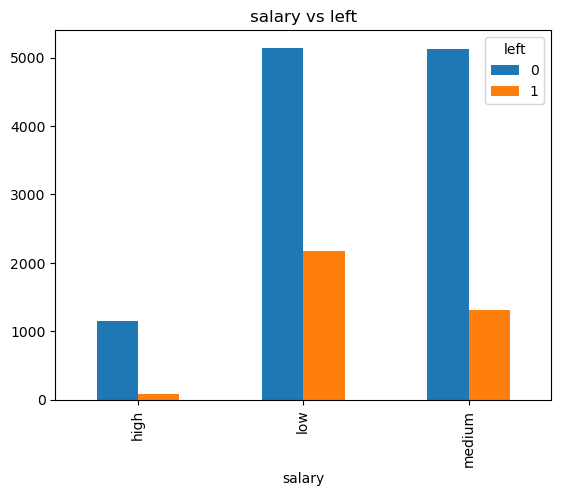

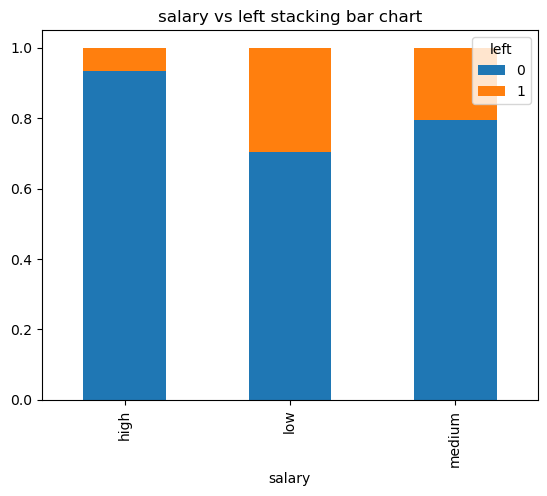

In [5]:
q = pd.crosstab(train_data['salary'], train_data['left'])
print(q)
q.plot(kind='bar', title='salary vs left')

## ratio
# print(q.sum(axis=1))
q1 = q.div(q.sum(axis=1), axis=0)
print(q1)
q1.plot(kind='bar', stacked=True, title='salary vs left stacking bar chart')

### Analyze data 2

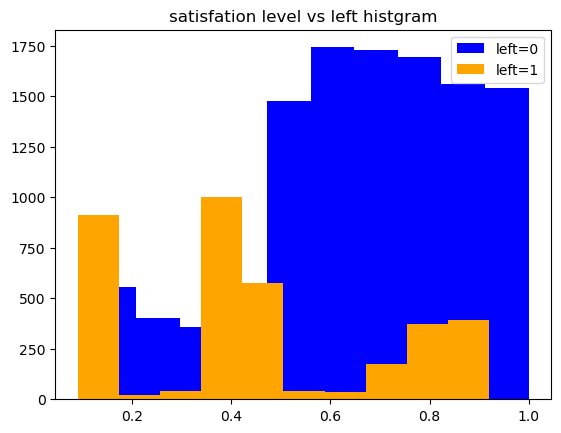

In [6]:
# train_data['satisfaction_level'].hist().plot()
plt.hist(train_data[train_data['left']==0]['satisfaction_level'], color='blue')
plt.hist(train_data[train_data['left']==1]['satisfaction_level'], color='orange')
plt.title("satisfation level vs left histgram")
plt.legend(['left=0', 'left=1'])
plt.show()

### Transform data and test split

In [7]:
Y, X = dmatrices('left ~ satisfaction_level + last_evaluation + number_project + average_montly_hours + time_spend_company + promotion_last_5years + C(sales) + C(salary)', data=train_data, return_type='dataframe')
print(X.columns)
print(X.shape)
print(Y.shape)
Y = np.ravel(Y)
print(Y.shape)
print(X.shape[1])
print(X.head(1))

c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib\site-packages\patsy\util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\miche\anaconda3\Lib

Index(['Intercept', 'C(sales)[T.RandD]', 'C(sales)[T.accounting]',
       'C(sales)[T.hr]', 'C(sales)[T.management]', 'C(sales)[T.marketing]',
       'C(sales)[T.product_mng]', 'C(sales)[T.sales]', 'C(sales)[T.support]',
       'C(sales)[T.technical]', 'C(salary)[T.low]', 'C(salary)[T.medium]',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'promotion_last_5years'],
      dtype='object')
(14999, 18)
(14999, 1)
(14999,)
18
   Intercept  C(sales)[T.RandD]  C(sales)[T.accounting]  C(sales)[T.hr]  \
0        1.0                0.0                     0.0             0.0   

   C(sales)[T.management]  C(sales)[T.marketing]  C(sales)[T.product_mng]  \
0                     0.0                    0.0                      0.0   

   C(sales)[T.sales]  C(sales)[T.support]  C(sales)[T.technical]  \
0                1.0                  0.0                    0.0   

   C(salary)[T.low]  C(salary)[T.medium]  satisfaction_leve

### Nomalize x values to the range of (0,1). calculate along x


In [8]:
print(X.shape[1])
for col in range(1, X.shape[1]):
    # print(f"col: {col}")
    min = X.iloc[:, col].min()
    max = X.iloc[:, col].max()
    X.iloc[:, col] = (X.iloc[:, col] - min) /(max - min)
print(X.head(1))

18
   Intercept  C(sales)[T.RandD]  C(sales)[T.accounting]  C(sales)[T.hr]  \
0        1.0                0.0                     0.0             0.0   

   C(sales)[T.management]  C(sales)[T.marketing]  C(sales)[T.product_mng]  \
0                     0.0                    0.0                      0.0   

   C(sales)[T.sales]  C(sales)[T.support]  C(sales)[T.technical]  \
0                1.0                  0.0                    0.0   

   C(salary)[T.low]  C(salary)[T.medium]  satisfaction_level  last_evaluation  \
0               1.0                  0.0            0.318681         0.265625   

   number_project  average_montly_hours  time_spend_company  \
0             0.0              0.285047               0.125   

   promotion_last_5years  
0                    0.0  


### Gadient decent to minimize loss function


In [31]:
# probability.  P(y= 1|x) = 1/(1 + e⁻ᵝᵀˣ)  = σ(βT * X).  ps: σ(x) = 1/(1 + e⁻ˣ)
# loss function - cross entropy     f = -1 / m * Σᵢᵐ ( yᵢ * log(P(xᵢ)) +  (1 - yᵢ) * log(1 - p(xᵢ))) 
# error rate 
# gradient of loss function. 
#       αfᵢ/αβ = Σⱼ (Yᵢ - Pᵢ) * Xⱼ  . i is row and j is column. 
# gradient decent with learning rate

np.random.seed(1)
beta = np.random.randn(X.shape[1]) # 1 * N shape
learning_rate = 1

X_train,X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

for step in range(15):
    P = 1./ (1 + np.exp(-np.matmul(X, beta)))# X is M * N while beta is 1 * N
    # print(P.shape)
    error_count = 0

    for i in range(len(Y)):
        if (P[i] >= 0.5 and Y[i] == 0) or (P[i] < 0.5 and Y[i] == 1) :
            error_count += 1    
    error_rate = error_count / len(Y) 

    loss_rate = -sum([np.log(P[i]) if Y[i] == 1 else np.log(1 - P[i]) for i in range(len(Y))]) / len(Y)
    # print(loss_rate )

    beta_derivative = np.zeros(X.shape[0]) # 1 * N array
    beta_derivative = np.average([(P[i] - Y[i]) * X.iloc[i,:].ravel() for i in range(len(Y))], axis=0)
    # print(beta_derivative.shape)
    beta -= beta_derivative * learning_rate

    if step % 2 == 0:
        print(f'step:{step} loss_rate : {loss_rate}, error_rate: {error_rate}' )

step:0 loss_rate : 1.1707031376564825, error_rate: 0.5113674244949663
step:2 loss_rate : 0.7520662761844693, error_rate: 0.39142609507300485
step:4 loss_rate : 0.6767322750625021, error_rate: 0.31135409027268485
step:6 loss_rate : 0.6525028265568007, error_rate: 0.2843522901526768
step:8 loss_rate : 0.636221490326729, error_rate: 0.27341822788185877
step:10 loss_rate : 0.6223502464860559, error_rate: 0.2694846323088206
step:12 loss_rate : 0.6100301818979627, error_rate: 0.2660177345156344
step:14 loss_rate : 0.5990472015287185, error_rate: 0.26428428561904127
step:16 loss_rate : 0.5892700380035488, error_rate: 0.26201746783118873
step:18 loss_rate : 0.5805733310072758, error_rate: 0.2602173478231882


## Test model

In [ ]:
X_train,X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)
print(model.coef_)
Y_valid_predict = model.predict(X_valid)


[[-0.7842606  -0.50965847  0.18352332  0.35806538 -0.2510461   0.08494427
   0.02933076  0.11092841  0.2268628   0.2406386   1.77426957  1.26069129
  -4.06173204  0.73464846 -0.30805159  0.00436829  0.24919075 -1.13999416]]


c:\Users\miche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate model

In [ ]:
print(pd.DataFrame(list(zip(X_train.columns, np.transpose(model.coef_.reshape(-1))))))
accurate_score_r = accuracy_score(Y_valid, Y_valid_predict)
print(accurate_score_r)
print(model.score(X,Y))

                          0         1
0                 Intercept -0.784261
1         C(sales)[T.RandD] -0.509658
2    C(sales)[T.accounting]  0.183523
3            C(sales)[T.hr]  0.358065
4    C(sales)[T.management] -0.251046
5     C(sales)[T.marketing]  0.084944
6   C(sales)[T.product_mng]  0.029331
7         C(sales)[T.sales]  0.110928
8       C(sales)[T.support]  0.226863
9     C(sales)[T.technical]  0.240639
10         C(salary)[T.low]  1.774270
11      C(salary)[T.medium]  1.260691
12       satisfaction_level -4.061732
13          last_evaluation  0.734648
14           number_project -0.308052
15     average_montly_hours  0.004368
16       time_spend_company  0.249191
17    promotion_last_5years -1.139994
0.774
0.7729181945463031


### Predit on test dataset


### Output

In [ ]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)